# Examen número 1: Métodos computacionales para físicos.

**NOTA:** El examen consta de 2 partes y se califica sobre 100 puntos. No puede usar ningún material adicional al examen (libros, notas, páginas de internet, etc), ni tampoco consultar a ninguna persona durante la realizacón del mismo. Recuerde que el fraude académico está sancionado en el Reglamento Estudiantil. El examen tiene una duración de 2 horas. Debe estar claramente escrito, desarrollado y justificado. Respuesta sin sustentación pierde sus puntos.


**Profesor:** Hernán David Salinas Jiménez.

Instituto de Física

Universidad de Antioquia



1. (70Pts). Un objeto que cae verticalmente en el aire sujeto a la resistencia del aire  y también a la fuerza de gravedad. Suponga que el objeto tiene una masa m y cae desde una  altura $s_0$ y que la altura del objeto después de $t$ segundos es:

\begin{equation}
s(t)=s_0-\frac{mg}{k} t + \frac{m^2g}{k^2}(1-e^{-kt/m})
\end{equation}

donde $g=9.8 \mathrm{m/s}$, $k=0.148\mathrm{kg\ s\ /m}$  es el coeficiente de resistencia con el aire. Suponga que $s_0 = 900m$ y  $m = 0.25\mathrm{kg}$. Para la situación planteada:  

a (10 Pts). Realizar un gráfico de $s$ como función del tiempo, para ello cree una función para  $s(t)$  llamada caida:

  ```python
  def caida():

    return
  ```



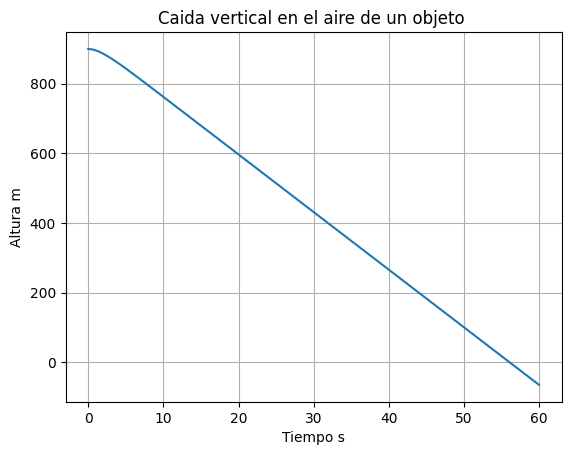

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def caida(t, g, k, s0, m):
  s = s0 - ((m*g)/k)*t + (((m**2*g)/k**2)*(1-np.exp(-(k*t)/m)))
  return s

g = 9.8
k = 0.148
s0 = 900
m = 0.25

t = np.linspace(0,60, 100)
y = caida(t, g, k, s0, m)
plt.figure()
plt.title("Caida vertical en el aire de un objeto ")
plt.xlabel("Tiempo s")
plt.ylabel("Altura m")
plt.plot(t,y)
plt.grid()



b (30 Pts). Determine el tiempo de caida del objeto, empleando el metodo de:

  - Secante

  - Newton-Rapshon.

  - Punto Fijo




In [42]:
from scipy import optimize as op
g = 9.8
k = 0.148
s0 = 900
m = 0.25
params = (g,k,s0,m)
epsilon = 1E-8

tc_secante = op.newton(caida, 60, args = params,tol=epsilon)
print("Por método de secante el tiempo de caida es = ", tc_secante)

def derivadaCaida(t, g, k, s0, m):
  d = -((m*g)/k)- ((m*g/k)*np.exp(-(k*t/m)))
  return d

tc_newton_raphson = op.newton(caida, 60, derivadaCaida, args = params,tol=epsilon)
print("Por método de Newton-Raphson el tiempo de caida es = ", tc_newton_raphson)

def funcionCaidaPuntoFijo(t, g, k, s0, m):
  f = t - (s0 - ((m*g)/k)*t + (((m**2*g)/k**2)*(1-np.exp(-(k*t)/m))))
  return f

tc_puntoFijo = op.fixed_point(funcionCaidaPuntoFijo, 60, args = params, xtol=epsilon)
print("Por método de Punto Fijo el tiempo de caida es = ", tc_puntoFijo)

Por método de secante el tiempo de caida es =  56.056536127964684
Por método de Newton-Raphson el tiempo de caida es =  56.056536127964684
Por método de Punto Fijo el tiempo de caida es =  56.05653612796469


In [39]:
from sympy.functions.combinatorial.numbers import euler

import sympy as sp
x=sp.symbols('x')
m=sp.symbols('m')
g=sp.symbols('g')
k=sp.symbols('k')
s0=sp.symbols('s0')
t=sp.symbols('t')
euler = sp.symbols('euler')
f = lambda t: s0 - ((m*g)/k)*t + (((m**2*g)/k**2)*(1-sp.exp((-(k*t)/m))))
f
# Primera derivada
sp.diff(f(t), t, 1)


-g*m/k + g*m*exp(-k*t/m)/k

c (30 Pts). Determine la el tiempo de caida para 10 valores de la masa entre $0.25$Kg y $1$Kg.



In [45]:
masas = np.linspace(0.25,1,10)
g = 9.8
k = 0.148
s0 = 900

for m in masas:
  m = round(m,2)
  params = (g,k,s0,m)
  tc = op.newton(caida, 60, args = params,tol=epsilon)
  tc = round(tc,2)
  print("Para una masa de ",m," kg, el tiempo de caida es de ", tc, " s")

Para una masa de  0.25  kg, el tiempo de caida es de  56.06  s
Para una masa de  0.33  kg, el tiempo de caida es de  43.42  s
Para una masa de  0.42  kg, el tiempo de caida es de  35.2  s
Para una masa de  0.5  kg, el tiempo de caida es de  30.56  s
Para una masa de  0.58  kg, el tiempo de caida es de  27.35  s
Para una masa de  0.67  kg, el tiempo de caida es de  24.79  s
Para una masa de  0.75  kg, el tiempo de caida es de  23.14  s
Para una masa de  0.83  kg, el tiempo de caida es de  21.87  s
Para una masa de  0.92  kg, el tiempo de caida es de  20.77  s
Para una masa de  1.0  kg, el tiempo de caida es de  20.0  s


Ayuda: Para comprobar que el cálculo de la derivada es el adecuado, se puede ayudar de la libreria de sympy. En el siguiente ejemplo se muestra el uso de la derivada para los primeros términos del problema:

```python
import sympy as sp
x=sp.symbols('x')
m=sp.symbols('m')
g=sp.symbols('g')
k=sp.symbols('k')
s0=sp.symbols('s0')
t=sp.symbols('t')

f = lambda t: s0-m*g*t/k
# Primera derivada
sp.diff(f(t), t, 1)

Métodos

scipy.optimize.newton
scipy.optimize.fixed_point
```


2.(30 Pts) Para el siguiente dataSet que contiene información del clima de un lugar determinado realizar lo siguiente:  ([Clima Data set](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv)).

a. Leer el data set.

In [65]:
import pandas as pd

url = "https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/Weather%20Data.csv"
df = pd.read_csv(url)

b. Listar todas las columnas como una lista.


In [66]:
l = list(df.columns)
l

['Date/Time',
 'Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa',
 'Weather']

c. Determinar los elemenntos únicos de la columna Wheater

In [67]:
wheater = df.Weather.unique()
print(wheater)

['Fog' 'Freezing Drizzle,Fog' 'Mostly Cloudy' 'Cloudy' 'Rain'
 'Rain Showers' 'Mainly Clear' 'Snow Showers' 'Snow' 'Clear'
 'Freezing Rain,Fog' 'Freezing Rain' 'Freezing Drizzle' 'Rain,Snow'
 'Moderate Snow' 'Freezing Drizzle,Snow' 'Freezing Rain,Snow Grains'
 'Snow,Blowing Snow' 'Freezing Fog' 'Haze' 'Rain,Fog' 'Drizzle,Fog'
 'Drizzle' 'Freezing Drizzle,Haze' 'Freezing Rain,Haze' 'Snow,Haze'
 'Snow,Fog' 'Snow,Ice Pellets' 'Rain,Haze' 'Thunderstorms,Rain'
 'Thunderstorms,Rain Showers' 'Thunderstorms,Heavy Rain Showers'
 'Thunderstorms,Rain Showers,Fog' 'Thunderstorms' 'Thunderstorms,Rain,Fog'
 'Thunderstorms,Moderate Rain Showers,Fog' 'Rain Showers,Fog'
 'Rain Showers,Snow Showers' 'Snow Pellets' 'Rain,Snow,Fog'
 'Moderate Rain,Fog' 'Freezing Rain,Ice Pellets,Fog'
 'Drizzle,Ice Pellets,Fog' 'Drizzle,Snow' 'Rain,Ice Pellets'
 'Drizzle,Snow,Fog' 'Rain,Snow Grains' 'Rain,Snow,Ice Pellets'
 'Snow Showers,Fog' 'Moderate Snow,Blowing Snow']


d. Crear un filtro para la columna Wheater cuando toma el valor de "Cloudy"

In [71]:
df_cloudy = df[df["Weather"]== "Cloudy"]
df_cloudy

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
17,1/1/2012 17:00,3.0,0.0,81,13,16.1,99.81,Cloudy
20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy
21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
...,...,...,...,...,...,...,...,...
8761,12/31/2012 1:00,-10.7,-14.0,77,15,25.0,101.50,Cloudy
8762,12/31/2012 2:00,-10.1,-13.4,77,9,25.0,101.45,Cloudy
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy
8765,12/31/2012 5:00,-10.2,-12.4,84,6,25.0,101.28,Cloudy


e. Para el filtro anterior,  realizar un gráfico de la columna "Temp_C" , "Press_kPa" como función del tiempo.


Ayudas.

Para generar la columna del  tiempo en numeral e necesario para la graficación,  emplee la siguiente linea:
```python
df["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M')
```

df.Time será la columna a lo largo de la cordenada independiente.



In [98]:
df["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M')
df_cloudy = df[df["Weather"]== "Cloudy"]




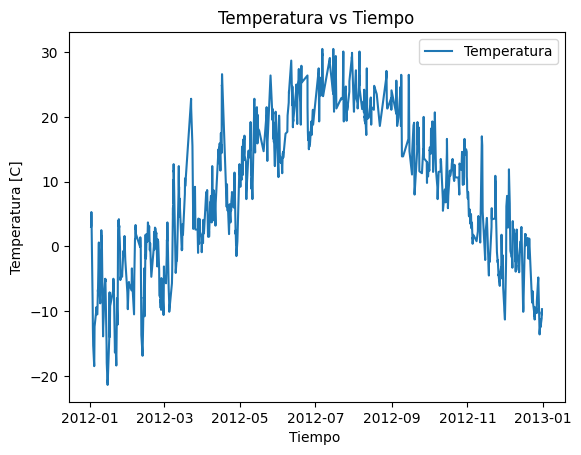

In [99]:

plt.title("Temperatura vs Tiempo" )
plt.xlabel("Tiempo ")
plt.ylabel("Temperatura [C]")
plt.plot(df_cloudy.Time,df_cloudy.Temp_C, label= "Temperatura")
plt.legend()



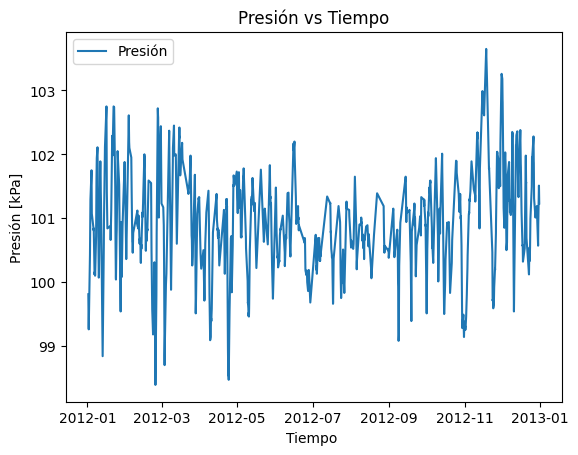

In [100]:
plt.title("Presión vs Tiempo" )
plt.xlabel("Tiempo ")
plt.ylabel("Presión [kPa]")
plt.plot(df_cloudy.Time,df_cloudy.Press_kPa, label= "Presión")
plt.legend()



Algunos comandos de pandas:


|Comando|	Descripción|
|-------|------------|
|pd.read_csv()|	Lee un archivo CSV y lo convierte en un DataFrame de Pandas
|pd.read_excel()|	Lee un archivo de Excel y lo convierte en un DataFrame de |Pandas|
|pd.read_json()|	Lee un archivo JSON y lo convierte en un DataFrame de Pandas|
|df.head()|	Muestra las primeras filas del DataFrame|
|df.tail()|	Muestra las últimas filas del DataFrame|
|df.info()|	Muestra información sobre el DataFrame|
|df.describe()|	Muestra estadísticas descriptivas del DataFrame|
|df.dropna()|	Elimina filas con valores faltantes|
|df.drop_duplicates()|	Elimina filas duplicadas|
|df.groupby()	|Agrupa el DataFrame por una o más columnas|
|df.sort_values()|	Ordena el DataFrame por una o más columnas|
|df.to_csv()|	Guarda el DataFrame como un archivo CSV|
|df.loc[condicion]|	Crea una máscara booleana para seleccionar filas que cumplan con ciertas condiciones|
|df[df["columna"]== x]|	Crea una máscara booleana y a la aplica al dataframe en caso de el valor de la columna coincida con la variable|